In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Read Data
df = pd.read_csv('001project.csv')

#Display all Data
df

#Create numpy array of numeric data

Die Daten sind eher nicht homogen verteilt, da die Standardabweichung der einzelnen Spalten sehr unterschiedlich ist.Die Spalte "TOTAL_TIME_STREAMED" hat eine sehr hohe Standardabweichung, was darauf hindeutet, dass die Werte in dieser Spalte weit auseinander liegen. Die Spalte "AVG_GAMES_PER_STREAM" hat eine sehr niedrige Standardabweichung, was darauf hindeutet, dass die Werte in dieser Spalte sehr nah beieinander liegen.



In [3]:
arr = np.array(df[['AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM', 'AVG_VIEWERS_PER_STREAM',
                   'AVG_GAMES_PER_STREAM', 'TOTAL_TIME_STREAMED', 'TOTAL_FOLLOWERS', 'TOTAL_VIEWS',
                   'TOTAL_GAMES_STREAMED', 'ACTIVE_DAYS_PER_WEEK']], dtype=np.float32)

mean = np.mean(arr, axis=0)
std = np.std(arr, axis=0)
var = np.var(arr, axis=0)
median = np.median(arr, axis=0)

print(f"{'Metric':<40}{'Mittelwert':<20}{'Standardabweichung':<20}{'Varianz':<20}{'Median':<20}")
labels = ['AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM', 'AVG_VIEWERS_PER_STREAM', 'AVG_GAMES_PER_STREAM',
          'TOTAL_TIME_STREAMED', 'TOTAL_FOLLOWERS', 'TOTAL_VIEWS', 'TOTAL_GAMES_STREAMED', 'ACTIVE_DAYS_PER_WEEK']
for i in range(len(mean)):
    print(f"{labels[i]:<40}{mean[i]:<20.4f}{std[i]:<20.4f}{var[i]:<20.4f}{median[i]:<20.4f}")

Metric                                  Mittelwert          Standardabweichung  Varianz             Median              
AVERAGE_STREAM_DURATION                 5.9967              3.2394              10.4937             5.4000              
FOLLOWERS_GAINED_PER_STREAM             3383.4456           2741.3232           7514853.0000        2450.0000           
AVG_VIEWERS_PER_STREAM                  19595.0840          43219.9375          1867962880.0000     6393.0000           
AVG_GAMES_PER_STREAM                    1.4779              0.5749              0.3305              1.3000              
TOTAL_TIME_STREAMED                     6504.7417           6727.7944           45263216.0000       4756.0000           
TOTAL_FOLLOWERS                         919403.3750         1724587.1250        2974200889344.0000  437000.0000         
TOTAL_VIEWS                             30014780.0000       62771840.0000       3940303660646400.00006950000.0000        
TOTAL_GAMES_STREAMED           

3 niedrigste und 3 höchste Werte der Spalte "TOTAL_TIME_STREAMED"

In [4]:
#Sortiere das Array
sorted_array = sorted(arr[:, 4])

#Drei niedrigste Werte
lowest_values = sorted_array[:3]

#Drei höchste Werte
highest_values = sorted_array[-3:]

print("Die drei niedrigsten Werte:", lowest_values)
print("Die drei höchsten Werte:", highest_values)

Die drei niedrigsten Werte: [27.0, 27.0, 39.0]
Die drei höchsten Werte: [44732.0, 52432.0, 90920.0]


Spaltenbezeichnungen sind sprechend gewählt, keine Änderungen nötig

In [5]:
#alles von davor mit pandas
data = df[['AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM',
           'AVG_VIEWERS_PER_STREAM', 'AVG_GAMES_PER_STREAM',
           'TOTAL_TIME_STREAMED', 'TOTAL_FOLLOWERS',
           'TOTAL_VIEWS', 'TOTAL_GAMES_STREAMED',
           'ACTIVE_DAYS_PER_WEEK']]

# Statistische Berechnungen mit Pandas
mean = data.mean()
std = data.std()
var = data.var()
median = data.median()

# Zusammenstellen der Statistiken in einem DataFrame
stats_df = pd.DataFrame({
    'Mittelwert': mean,
    'Standardabweichung': std,
    'Varianz': var,
    'Median': median
})

print(stats_df)


                               Mittelwert  Standardabweichung       Varianz  \
AVERAGE_STREAM_DURATION      5.996697e+00        3.241013e+00  1.050417e+01   
FOLLOWERS_GAINED_PER_STREAM  3.383445e+03        2.742696e+03  7.522383e+06   
AVG_VIEWERS_PER_STREAM       1.959508e+04        4.324158e+04  1.869835e+09   
AVG_GAMES_PER_STREAM         1.477878e+00        5.751893e-01  3.308428e-01   
TOTAL_TIME_STREAMED          6.504742e+03        6.731164e+03  4.530857e+07   
TOTAL_FOLLOWERS              9.194033e+05        1.725451e+06  2.977181e+12   
TOTAL_VIEWS                  3.001478e+07        6.280328e+07  3.944252e+15   
TOTAL_GAMES_STREAMED         1.417077e+02        2.459305e+02  6.048179e+04   
ACTIVE_DAYS_PER_WEEK         3.591391e+00        1.797796e+00  3.232070e+00   

                                Median  
AVERAGE_STREAM_DURATION            5.4  
FOLLOWERS_GAINED_PER_STREAM     2450.0  
AVG_VIEWERS_PER_STREAM          6393.0  
AVG_GAMES_PER_STREAM               1.3  
TOTA

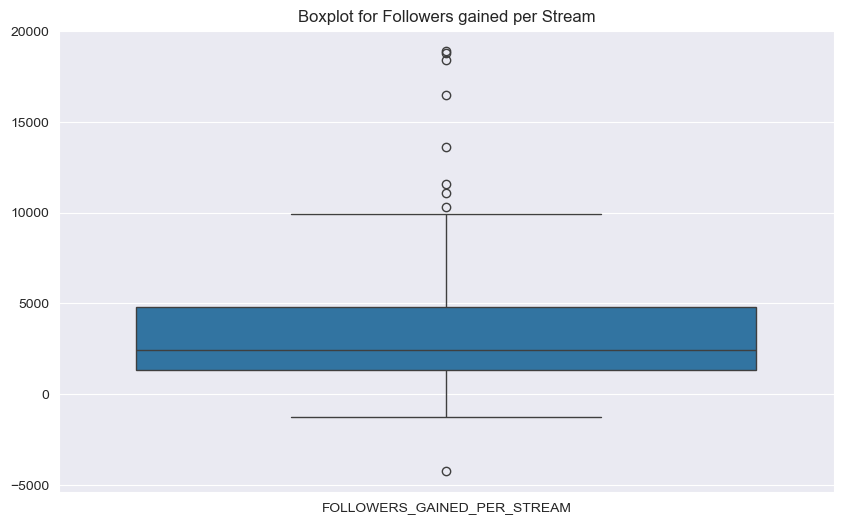

In [6]:
#Show data as boxplot with seaborn but only the for Followed gained per stream
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['FOLLOWERS_GAINED_PER_STREAM']])
plt.title('Boxplot for Followers gained per Stream')
plt.show()



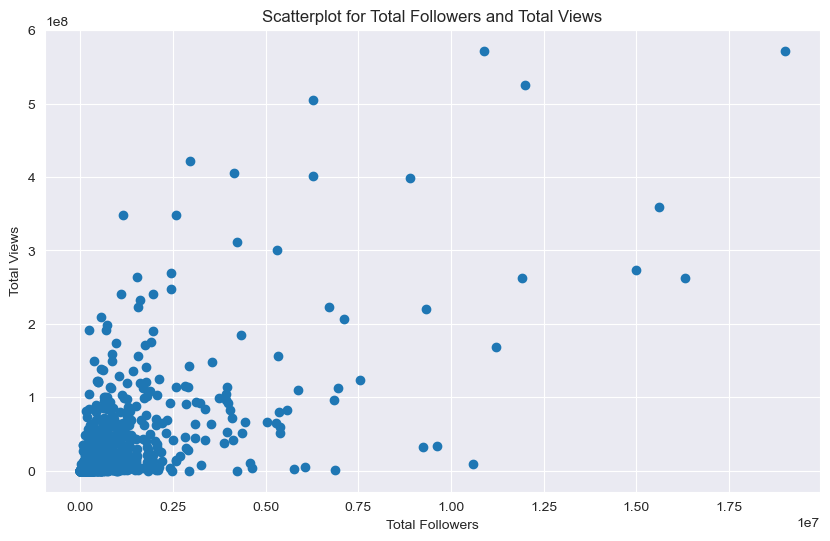

In [7]:
#Create a Scatterplot for the columns 'TOTAL_FOLLOWERS' and 'TOTAL_VIEWS' 
plt.figure(figsize=(10, 6))
plt.scatter(df['TOTAL_FOLLOWERS'], df['TOTAL_VIEWS'])
plt.xlabel('Total Followers')
plt.ylabel('Total Views')
plt.title('Scatterplot for Total Followers and Total Views')
plt.show()

Es gibt keine Duplikate in den Daten.

In [8]:
#Search for duplicates
duplicates = df.duplicated()
duplicates.sum()

0

Es gibt keine irelevanten Daten, da alle für unser Modell relevant sind.

In [9]:
#Check for missing values
missing_values = df.isnull().sum()
missing_values

RANK                               0
NAME                               0
LANGUAGE                           0
TYPE                               0
MOST_STREAMED_GAME                 0
2ND_MOST_STREAMED_GAME            77
AVERAGE_STREAM_DURATION            0
FOLLOWERS_GAINED_PER_STREAM        0
AVG_VIEWERS_PER_STREAM             0
AVG_GAMES_PER_STREAM               0
TOTAL_TIME_STREAMED                0
TOTAL_FOLLOWERS                    0
TOTAL_VIEWS                        0
TOTAL_GAMES_STREAMED               0
ACTIVE_DAYS_PER_WEEK               0
MOST_ACTIVE_DAY                    0
DAY_WITH_MOST_FOLLOWERS_GAINED     0
dtype: int64

Bei null Werten bei 2nd most streamed game wird der Wert von MOST_STREAMED_GAME übernommen. SimpleInputer würde hier keinen Sinn machen, da es sehr wahrscheinlich zu fehleinschätzungen kommen würde.

In [10]:
#If 2ND_MOST_STREAMED_GAME is missing, fill it with the MOST_STREAMED_GAME
df['2ND_MOST_STREAMED_GAME'].fillna(df['MOST_STREAMED_GAME'], inplace=True)

In [11]:
from sklearn.ensemble import RandomForestRegressor

features = ['AVERAGE_STREAM_DURATION', 'TOTAL_FOLLOWERS',
            'AVG_GAMES_PER_STREAM', 'TOTAL_TIME_STREAMED', 'RANK', 'TOTAL_VIEWS',
            'ACTIVE_DAYS_PER_WEEK']
X = df[features]
y = df['AVG_VIEWERS_PER_STREAM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'\nRandom Forest - MSE: {mse_rf}')
print(f'Random Forest - R² Score: {r2_rf}')


Mean Squared Error (MSE): 1139956722.3757966
R² Score: 0.36718587860576346

Random Forest - MSE: 685290047.8273336
Random Forest - R² Score: 0.6195809796952026


Der Random Forest kann durh max Tiefe und min Samples per Leaf leicht verbessert werden. Toleranz von 1000 wurde festgesetzt um die vorhersagen zu verbessern. Mit selectKBest werden die besten 5 Features ausgewählt, das führt ebenfalls zu einer kleinen Verbessereung.

In [12]:
from sklearn.metrics import mean_absolute_error

# Code bleibt gleich bis zur Berechnung der MSE und R²
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ursprüngliche Feature-Liste
features = ['AVERAGE_STREAM_DURATION', 'TOTAL_FOLLOWERS',
            'AVG_GAMES_PER_STREAM', 'TOTAL_TIME_STREAMED', 'RANK', 'TOTAL_VIEWS',
            'ACTIVE_DAYS_PER_WEEK']
X = df[features]
y = df['AVG_VIEWERS_PER_STREAM']

# Feature Selection mit SelectKBest
k = 5  # Anzahl der besten Features, die ausgewählt werden sollen
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Anzeigen der ausgewählten Features
selected_features = selector.get_support(indices=True)
print("Ausgewählte Features:", [features[i] for i in selected_features])

# Split der Daten
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Skalierung der Daten
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lineare Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, max_depth=5, min_samples_leaf=3)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'\nRandom Forest - MSE: {mse_rf}')
print(f'Random Forest - R² Score: {r2_rf}')

# Berechnung der Toleranz
tolerance = 1000
within_tolerance = sum(abs(y_test - y_pred_rf) <= tolerance)
total_samples = len(y_test)
tolerance_percentage = (within_tolerance / total_samples) * 100

print(f'Vorhersagen innerhalb der Toleranz von {tolerance}: {within_tolerance} von {total_samples}')
print(f'Prozentsatz der Vorhersagen innerhalb der Toleranz: {tolerance_percentage:.2f}%')

Ausgewählte Features: ['TOTAL_FOLLOWERS', 'AVG_GAMES_PER_STREAM', 'TOTAL_TIME_STREAMED', 'RANK', 'TOTAL_VIEWS']
Mean Squared Error (MSE): 1205264866.9120955
R² Score: 0.33093194431736883

Random Forest - MSE: 766127510.4054275
Random Forest - R² Score: 0.5747063920437671
Vorhersagen innerhalb der Toleranz von 1000: 56 von 200
Prozentsatz der Vorhersagen innerhalb der Toleranz: 28.00%


### Welchen K Wert würdest du zum Starten auswählen
Die Wurzel aus 200(Trainingsdaten) ergibt 14

### Wie sieht das Ergebnis aus?
Eher schlecht weil most streamed game sehr unausgeglichen ist.

In [13]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data, df['MOST_STREAMED_GAME'], test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

accuracy = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy: {accuracy}")

Accuracy: 0.23


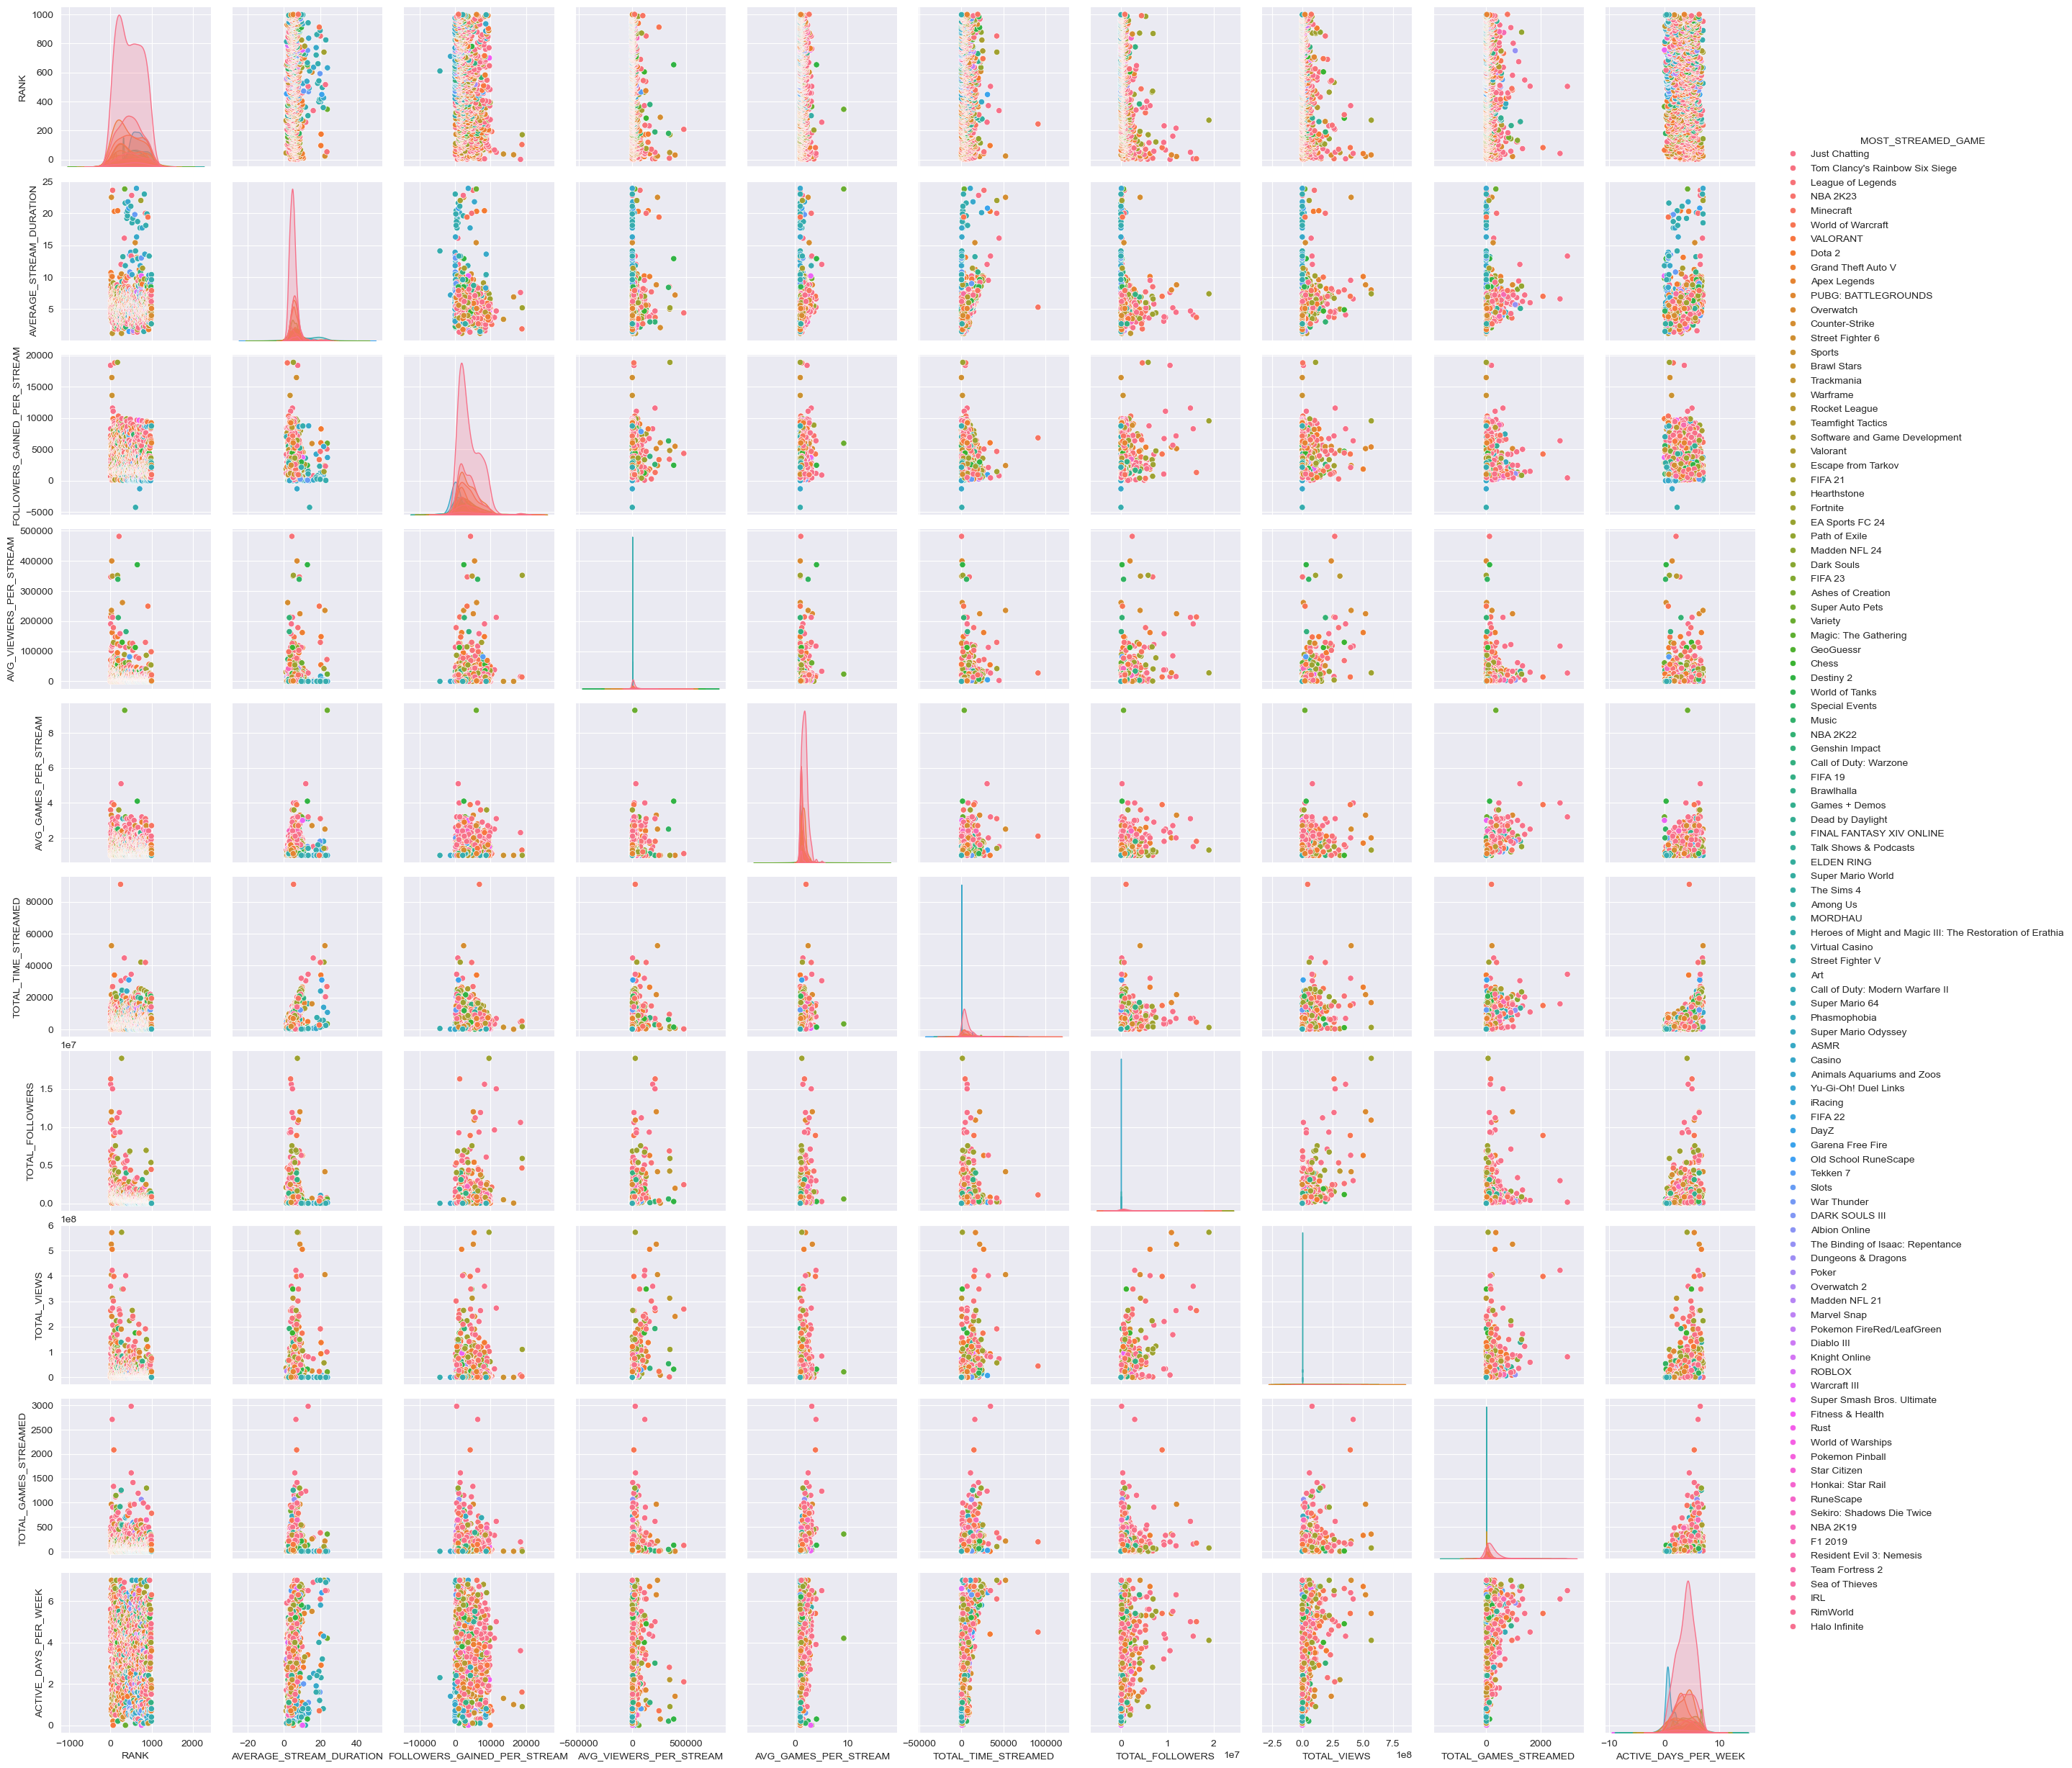

In [14]:
#zeige most streamed game in pairplot 

sns.pairplot(df, hue='MOST_STREAMED_GAME')
plt.show()

In [15]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder

#select with kbest die besten 5 features

# Features and target variable
features = ['AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM', 'AVG_VIEWERS_PER_STREAM',
            'AVG_GAMES_PER_STREAM', 'TOTAL_TIME_STREAMED', 'TOTAL_FOLLOWERS',
            'TOTAL_VIEWS', 'TOTAL_GAMES_STREAMED', 'ACTIVE_DAYS_PER_WEEK']
X = df[features]
y = df['MOST_STREAMED_GAME']

# Encode the target variable if categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Select the best 5 features
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y_encoded)

# Save the selected features into a DataFrame
selected_features = selector.get_support(indices=True)
X_selected = X.iloc[:, selected_features]

print("Selected Features:")
print(X_selected)

Selected Features:
     AVERAGE_STREAM_DURATION  AVG_GAMES_PER_STREAM  TOTAL_TIME_STREAMED  \
0                        7.6                   2.3                 4698   
1                        5.4                   1.2                 8407   
2                        6.3                   1.3                 6728   
3                        4.6                   3.6                 2554   
4                        4.1                   1.5                 6865   
..                       ...                   ...                  ...   
994                      4.0                   1.3                 1873   
995                     10.4                   1.0                  210   
996                      9.6                   1.0                  190   
997                      5.1                   1.1                 6827   
998                      7.9                   2.7                19426   

     TOTAL_FOLLOWERS  ACTIVE_DAYS_PER_WEEK  
0           10600000               


# Support Vector Machine
## Musst du bei SVMs eine Skalierung der Daten durchführen?
Ja, da sonst die Gewichtung der Features nicht korrekt ist und die SVM nicht korrekt funktioniert.
## Welche Skallierung ist für dich am sinnvollsten?
RobustScaler ist am sinnvollsten, da wir viele Ausreißer haben

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Annahme: Der Datensatz ist in einer CSV-Datei gespeichert
data = pd.read_csv("001project.csv")

# Numerische Features auswählen
features = X_selected.columns

X = data[features]
y = data["AVG_VIEWERS_PER_STREAM"]  # Zielvariable

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Daten vorbereiten
features = ["AVERAGE_STREAM_DURATION", "FOLLOWERS_GAINED_PER_STREAM",
            "AVG_VIEWERS_PER_STREAM", "TOTAL_TIME_STREAMED",
            "TOTAL_VIEWS", "TOTAL_GAMES_STREAMED"]
X = data[features]
y = data["TOTAL_FOLLOWERS"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalierer auswählen
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Hyperparameter-Grid für die SVM
param_grid = {
    "C": [0.1, 1, 10, 39, 50, 100, 150],  # Verschiedene C-Werte
    "kernel": ["linear", "rbf", "poly", "sigmoid"],  # Verschiedene Kernel
    "gamma": ["scale", "auto"]  # Nur für RBF und Poly relevant
}

# Ergebnisse speichern
results = {}

# Skalierer und SVM testen
for scaler_name, scaler in scalers.items():
    # Daten skalieren
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # GridSearchCV für Hyperparameter-Tuning
    svm = SVR()
    grid_search = GridSearchCV(svm, param_grid, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Bestes Modell und Vorhersagen
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    accuracy = best_model.score(X_test_scaled, y_test);
    # Ergebnisse speichern
    results[scaler_name] = {
        "best_params": grid_search.best_params_,
        "mse": mse,
        "score": accuracy
    }

# Ergebnisse anzeigen
for scaler_name, result in results.items():
    print(f"Skalierer: {scaler_name}")
    print(f"Beste Parameter: {result['best_params']}")
    print(f"MSE: {result['mse']}")
    print(f"Score: {result['score']}")
    print("-" * 40)

Skalierer: StandardScaler
Beste Parameter: {'C': 150, 'gamma': 'scale', 'kernel': 'poly'}
MSE: 1391387472472.708
Score: 0.15750219381948571
----------------------------------------
Skalierer: MinMaxScaler
Beste Parameter: {'C': 150, 'gamma': 'scale', 'kernel': 'poly'}
MSE: 1502338583007.6475
Score: 0.09032028434544337
----------------------------------------
Skalierer: RobustScaler
Beste Parameter: {'C': 39, 'gamma': 'auto', 'kernel': 'poly'}
MSE: 1079156580446.462
Score: 0.34656084696835343
----------------------------------------


Clustering ist eine Methode des Unsupervised Learnings. Verwende Clustering, um
Muster in deinen Daten zu finden.
• Wie viele Gruppen denkst du, dass es in deinen Daten gibt? Probiere diesen Wert
als ersten Startwert für K.
• Visualisiere die Gruppen, die von K-Means identifiziert wurde anhand zweier
Features.

In [29]:
from sklearn.preprocessing import StandardScaler

# Auswahl der numerischen Features
numeric_features = ['AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM', 'AVG_VIEWERS_PER_STREAM',
                    'AVG_GAMES_PER_STREAM', 'TOTAL_TIME_STREAMED', 'TOTAL_FOLLOWERS',
                    'TOTAL_VIEWS', 'TOTAL_GAMES_STREAMED', 'ACTIVE_DAYS_PER_WEEK']

# Standardisierung der Daten
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_features])

C:\Users\simon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\simon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\simon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\simon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

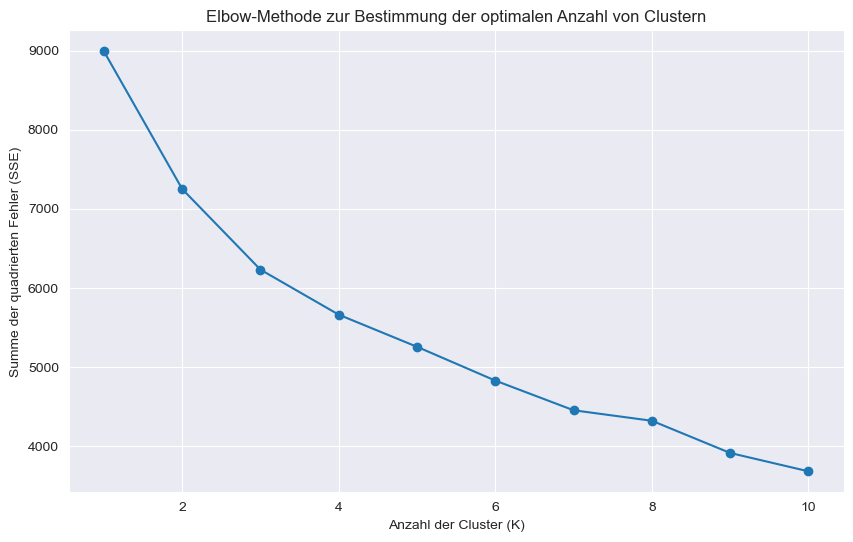

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow-Methode zur Bestimmung der optimalen Anzahl von Clustern
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Visualisierung der Elbow-Methode
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Anzahl der Cluster (K)')
plt.ylabel('Summe der quadrierten Fehler (SSE)')
plt.title('Elbow-Methode zur Bestimmung der optimalen Anzahl von Clustern')
plt.show()

In [31]:
# Anwendung von K-Means mit K=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

C:\Users\simon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


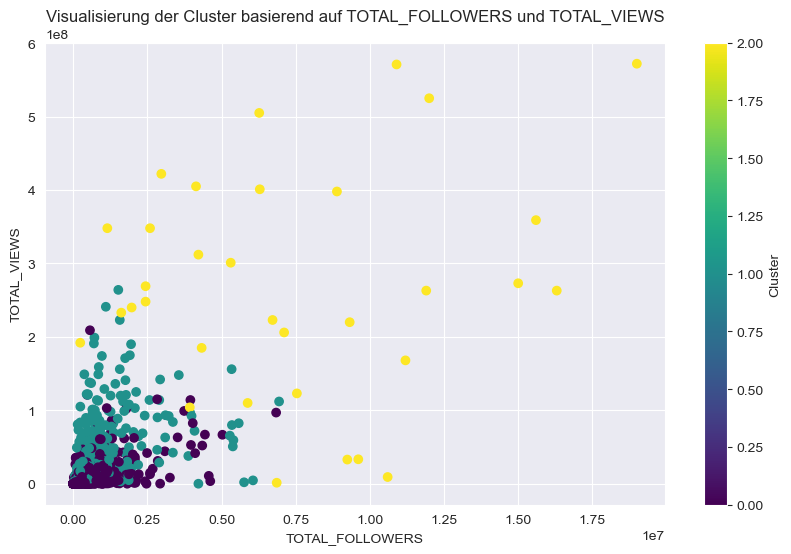

In [32]:
# Visualisierung der Cluster
plt.figure(figsize=(10, 6))
plt.scatter(df['TOTAL_FOLLOWERS'], df['TOTAL_VIEWS'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('TOTAL_FOLLOWERS')
plt.ylabel('TOTAL_VIEWS')
plt.title('Visualisierung der Cluster basierend auf TOTAL_FOLLOWERS und TOTAL_VIEWS')
plt.colorbar(label='Cluster')
plt.show()